<a href="https://colab.research.google.com/github/abdelmageed1/Logistic-Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Importing the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DataSets/Social_Network_Ads.csv')
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[ : ,-1]
X.shape

(400, 2)

In [ ]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split( X,y ,test_size=0.25)


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)



Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression

classifer  = LogisticRegression(random_state=0)

classifer.fit(X_train , y_train)


LogisticRegression(random_state=0)

Predicting a new result

In [ ]:
print('When Age = 30 , Estimated Salary = 87000 the Purchased (label) = ',classifer.predict(sc_x.transform([[30 , 87000]])))

When Age = 30 , Estimated Salary = 87000 the Purchased (label) =  [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicting the Test set results

In [ ]:

y_pred_test = classifer.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

 Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_test)
cm

array([[58,  6],
       [10, 26]])

In [ ]:
classifer.score(X_train,y_train)

0.8433333333333334

Visualising the Confusion Matrix

<Axes: >

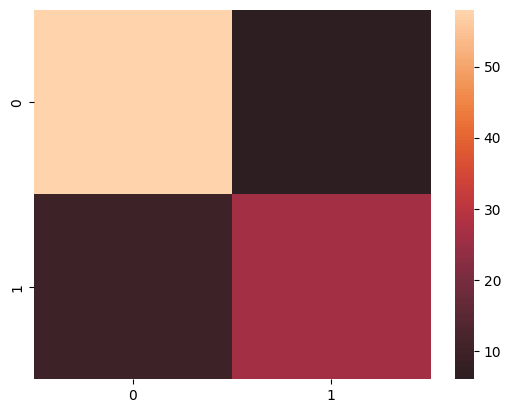

In [ ]:
import seaborn as sns
sns.heatmap(cm ,center=True)
